revision machine learning

In [1]:
import os
import io
import gzip
import random
import secrets
import datetime
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
import plotly.io as pio
from sklearn import tree
import plotly.express as px
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from flask import Flask, request, render_template, session, url_for, redirect

In [4]:
# load dataframe
# preparation du dataframe
df = sns.load_dataset("titanic")

In [7]:
# df.select_dtypes('number').value_counts()
df.select_dtypes("number").sum()

survived      342.0000
pclass       2057.0000
age         21205.1700
sibsp         466.0000
parch         340.0000
fare        28693.9493
dtype: float64


shape: (891, 15) 
list columns :
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'] 

 valeurs les plus represtentée:
survived  pclass  age   sibsp  parch  fare   
0         3       17.0  0      0      8.6625     3
          2       30.0  0      0      13.0000    3
                  23.0  0      0      13.0000    3
          3       19.0  0      0      7.8958     3
          2       25.0  0      0      13.0000    3
                                                ..
          3       21.0  1      0      9.8250     1
                        2      2      34.3750    1
                  22.0  0      0      7.1250     1
                                      7.2292     1
1         3       63.0  0      0      9.5875     1
Name: count, Length: 663, dtype: int64 

liste des colonnes numeriques: 
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

liste des colonnes non numeriques: 
['sex', 'emba

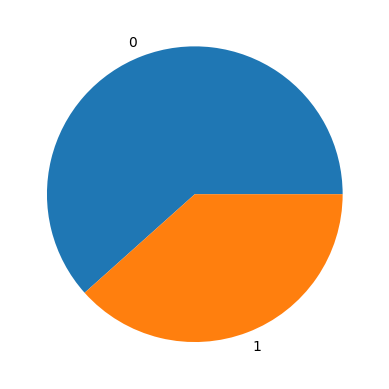

In [13]:
# Résumé des informations du dataframe
your_dataframe = df
print(f"\nshape: {your_dataframe.shape} \nlist columns :\n{
      your_dataframe.columns.tolist()} ")
print(f"\n valeurs les plus represtentée:\n{
      df.select_dtypes('number').value_counts()} \n")
print(f"liste des colonnes numeriques: \n{
      your_dataframe.select_dtypes(include=[np.number]).columns.tolist()}\n")
print(f"liste des colonnes non numeriques: \n{
      your_dataframe.select_dtypes(exclude=[np.number]).columns.tolist()} ")
print(f"Noms des colonnes avec au moins une valeur NA : {
      your_dataframe.columns[your_dataframe.isna().any()].tolist()}")
print(f"Nombre de lignes avec au moins une valeur NA : {
      your_dataframe.isna().any(axis=1).sum()}")
print(f"Colonne avec des na :{your_dataframe.isna().sum()} \n")
print(f"\ndf head :\n{your_dataframe.head(2)} \n")
print(f"\ndf describe :\n{your_dataframe.describe()} \n")
plt.pie(your_dataframe["survived"].value_counts(),
        labels=your_dataframe["survived"].value_counts().index)
plt.show()

<Axes: >

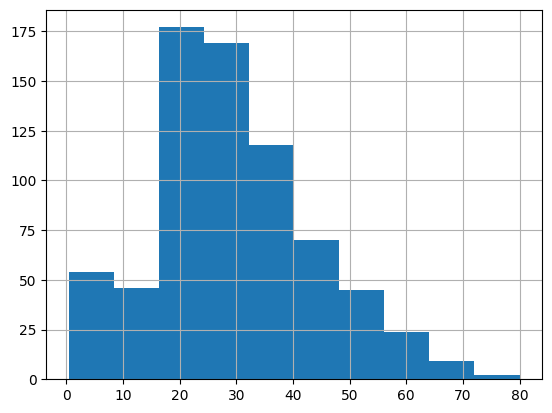

In [15]:
df["age"].hist()

Calcul des statistiques descriptives, la kurtosis et l’asymétrie, pour la colonne ‘age’ de votre DataFrame df.

**Kurtosis** (Kurtosis en français) : La kurtosis est une mesure statistique qui décrit la forme de la distribution d’une variable aléatoire, plus précisément le “pic” ou la “queue” de la distribution. Une kurtosis positive indique une distribution avec des queues plus lourdes et un pic plus aigu que la distribution normale (plus de valeurs extrêmes), tandis qu’une kurtosis négative indique une distribution avec des queues plus légères et un pic plus plat que la distribution normale (moins de valeurs extrêmes).

**Skewness** (Asymétrie en français) : L’asymétrie est une mesure de l’asymétrie de la distribution d’une variable aléatoire autour de sa moyenne. Une asymétrie positive signifie que la distribution a une queue plus longue à droite, tandis qu’une asymétrie négative signifie qu’elle a une queue plus longue à gauche. Une asymétrie de 0 indique une distribution parfaitement symétrique.

Dans votre code, df["age"].kurtosis() calcule la kurtosis de la colonne ‘age’ et df["age"].skew() calcule l’asymétrie de la colonne ‘age’. J’espère que cela vous aide 

In [16]:
kurtosis_df = df["age"].kurtosis()
print(f"\n kurtosis_df:\n{kurtosis_df} \n")
skewness_df = df["age"].skew()
print(f"\nskewness_df :\n{skewness_df} \n")


 kurtosis_df:
0.17827415364210353 


skewness_df :
0.38910778230082704 



Nettoyage

In [18]:
# pour l'age on voit qu'il manque environ 180 entrées
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [22]:
# trouver les correlations
correlation = df.select_dtypes("number").corr()
print(f"\ncorrelation :\n{correlation} \n")
# Le coefficient de corrélation est une mesure statistique qui indique comment deux variables sont liées. Il varie de -1 à 1 :

# Un coefficient de corrélation proche de 1 indique une forte corrélation positive entre les deux variables (lorsque l’une augmente, l’autre aussi).
# Un coefficient proche de -1 indique une forte corrélation négative (lorsque l’une augmente, l’autre diminue).
# Un coefficient proche de 0 indique qu’il n’y a pas de corrélation linéaire entre les deux variables.


correlation :
          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
sibsp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000 



In [33]:
# pour la colonne age on peut regrouper par tranche d'Age
tranche_age = [
    "0-10",
    "11-20",
    "21-30",
    "31,40",
    "41-50",
    "51-60",
    "61-70",
    "71-80",
    "81-90",
    "91-100",
]

In [46]:
liste = []
for age in df["age"]:
    if age >= 0 and age <= 10:
        liste.append("0-10")
    elif age > 10 and age <= 20:
        liste.append("11-20")
    elif age > 20 and age <= 30:
        liste.append("21-30")
    elif age > 30 and age <= 40:
        liste.append("31-40")
    elif age > 40 and age <= 50:
        liste.append("41-50")
    elif age > 50 and age <= 60:
        liste.append("51-60")
    elif age > 60 and age <= 70:
        liste.append("61-70")
    elif age > 70 and age <= 80:
        liste.append("71-80")
    elif age > 80:
        liste.append("81+")
    else:
        liste.append("inconnu")

df["tranche_dage"] = liste
print(f"\n tranche_dage :\n{df["tranche_dage"]} \n")
df.head(5)


 tranche_dage :
0        21-30
1        31-40
2        21-30
3        31-40
4        31-40
        ...   
886      21-30
887      11-20
888    inconnu
889      21-30
890      31-40
Name: tranche_dage, Length: 891, dtype: object 



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,tranche_dage
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,21-30
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,31-40
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,21-30
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,31-40
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,31-40


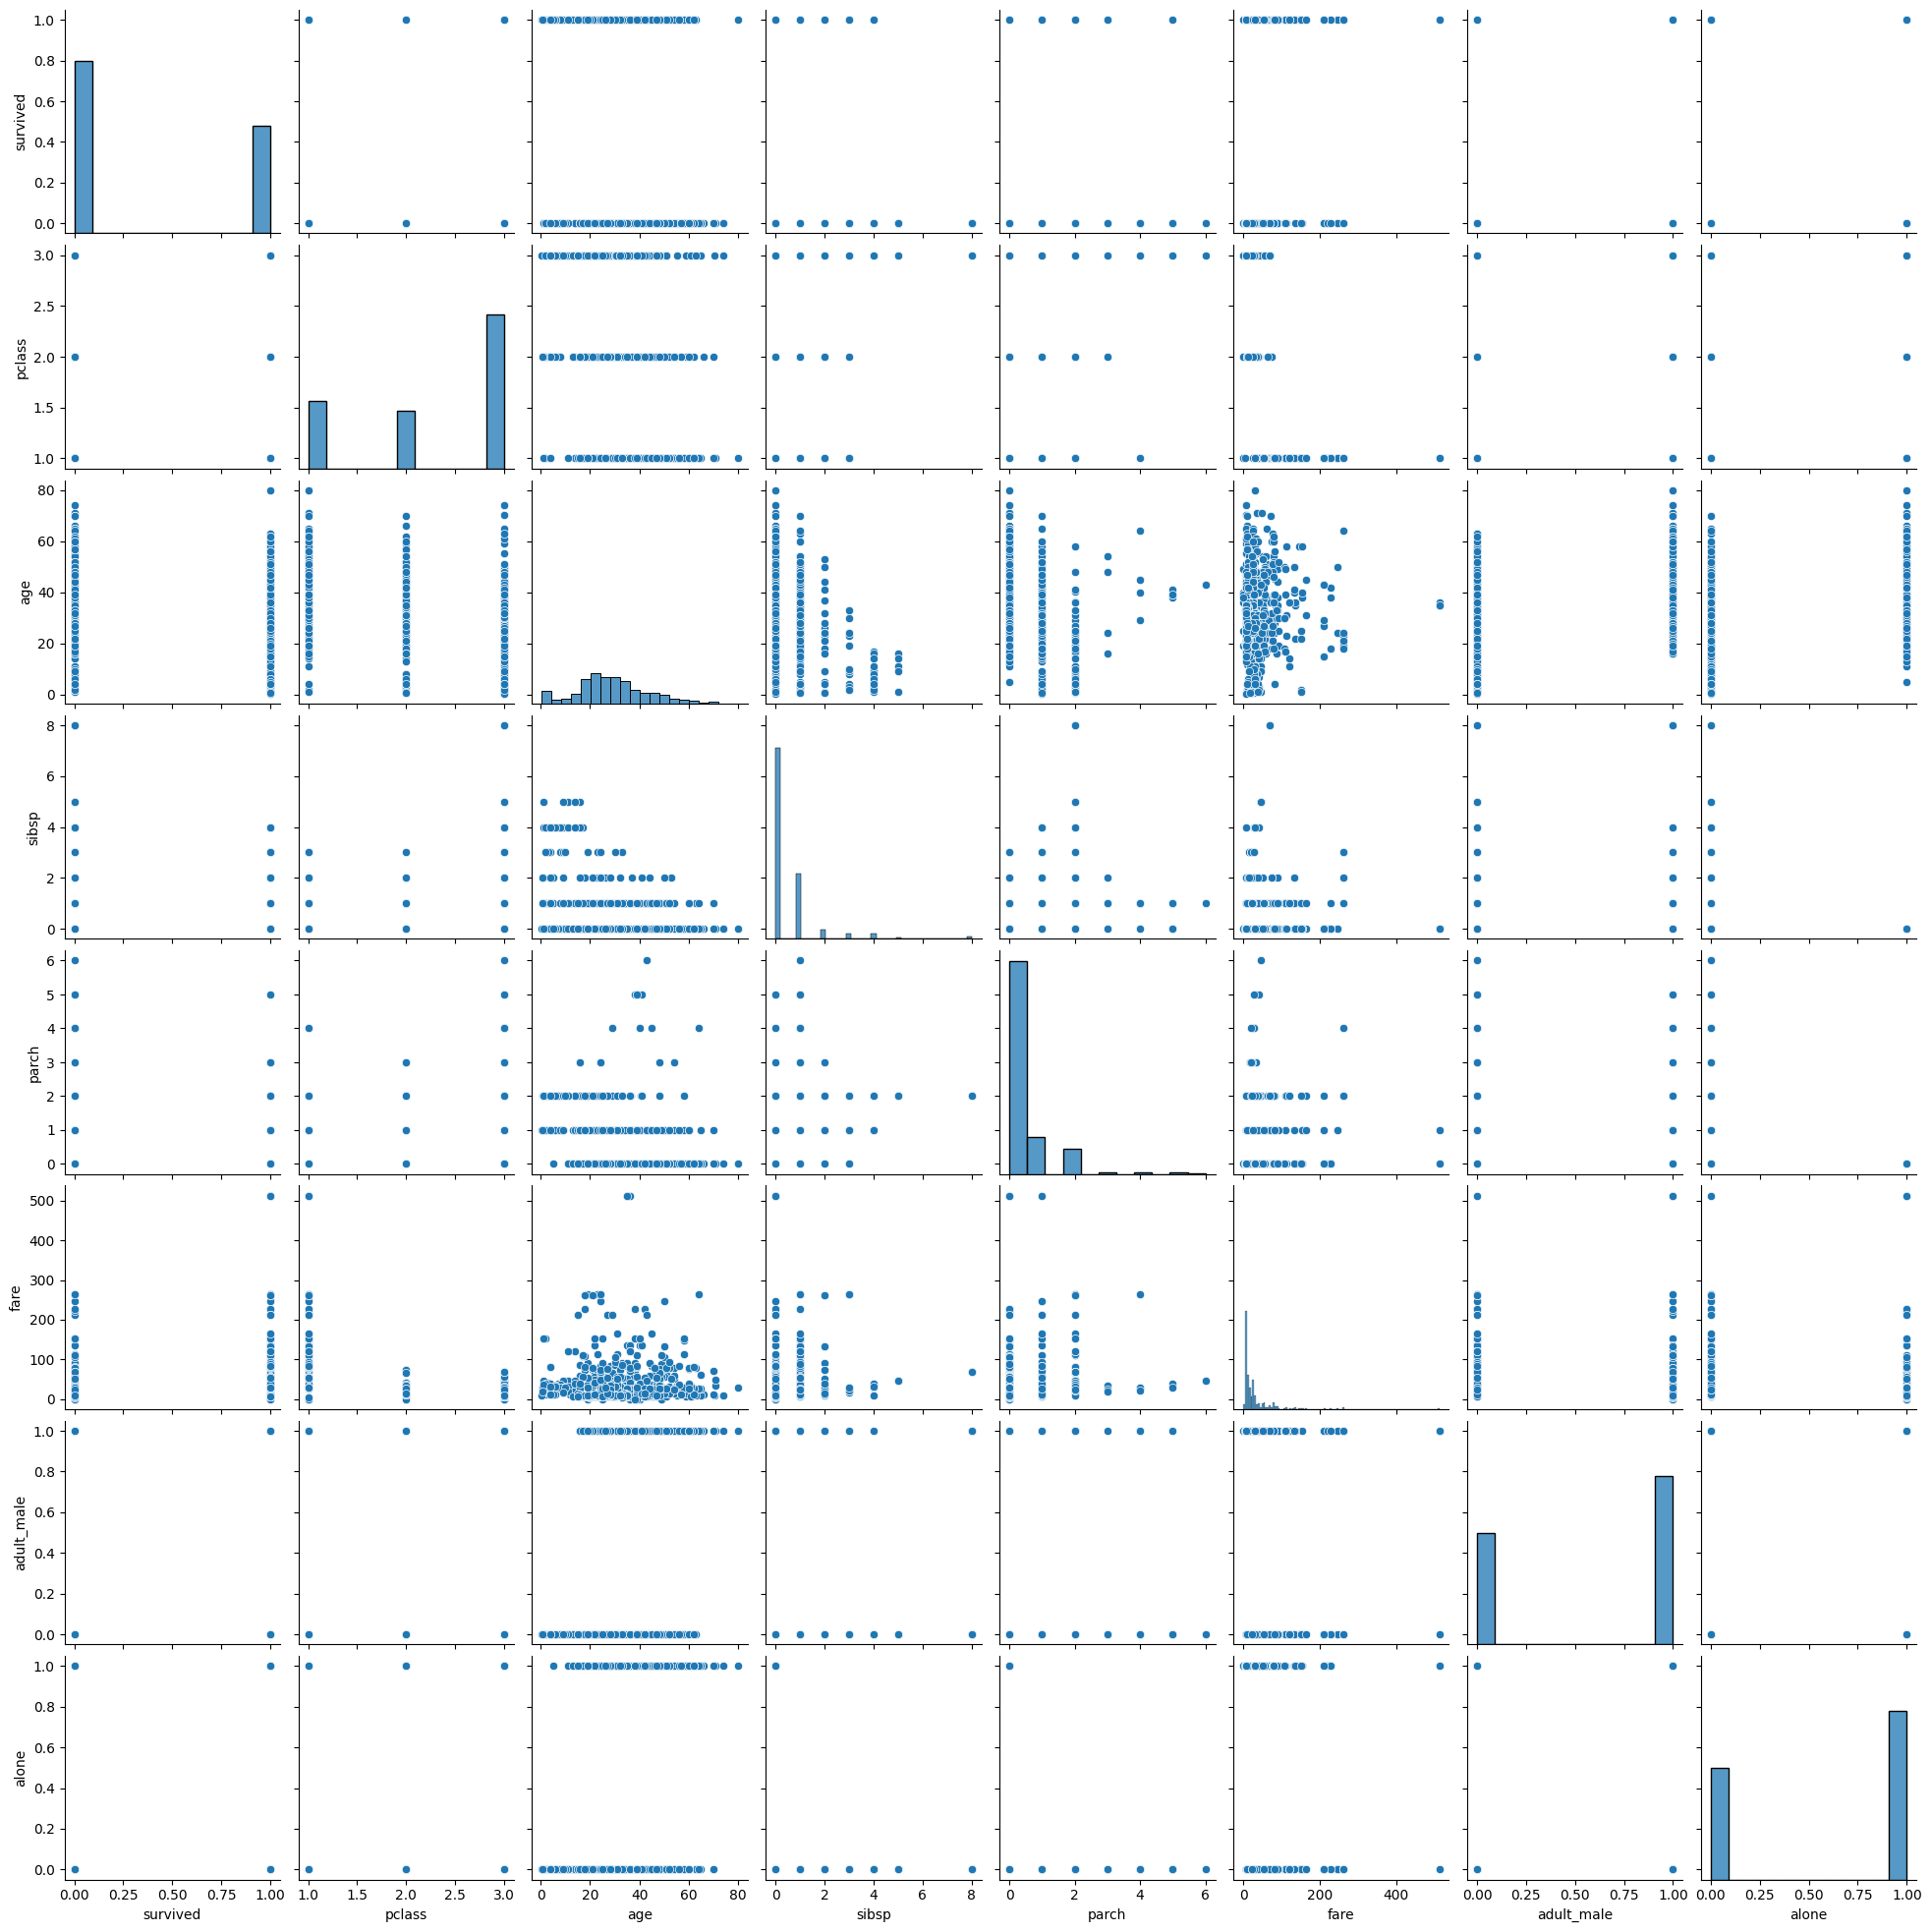

In [48]:
sns.pairplot(df)

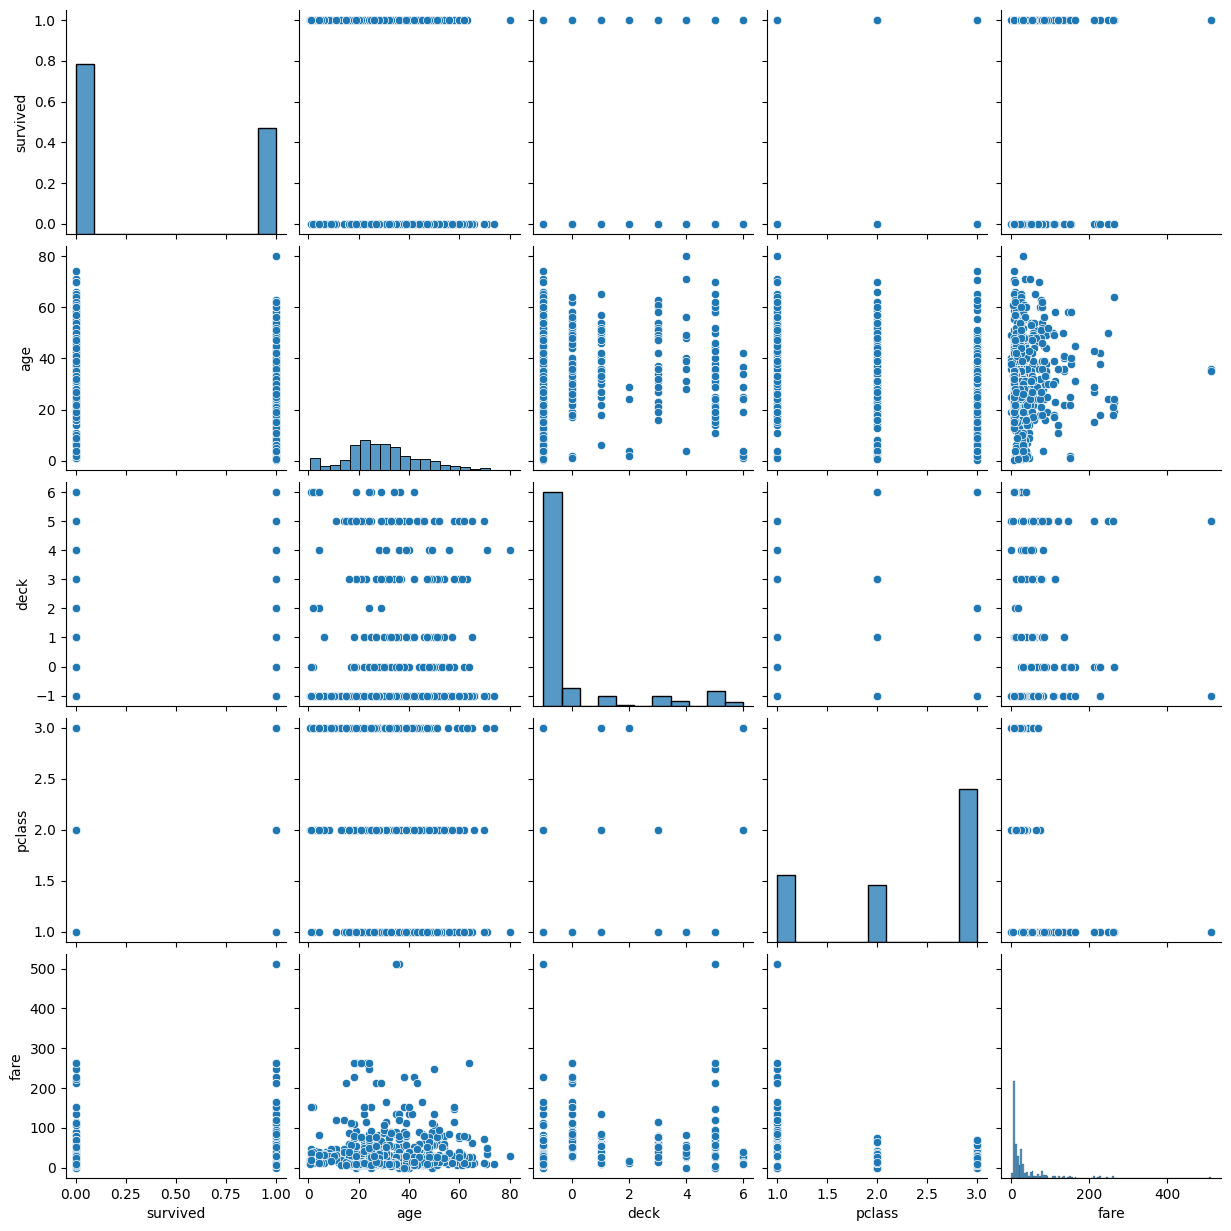

In [54]:
# trasnformation de la colonne dexk en vazleur numerique
df["deck"], _ = pd.factorize(df["deck"])
# Sélectionnez uniquement les colonnes spécifiques
df_selected = df[["survived", "age", "deck", "pclass", "fare"]]

# Créez le pairplot
sns.pairplot(df_selected)
plt.show()

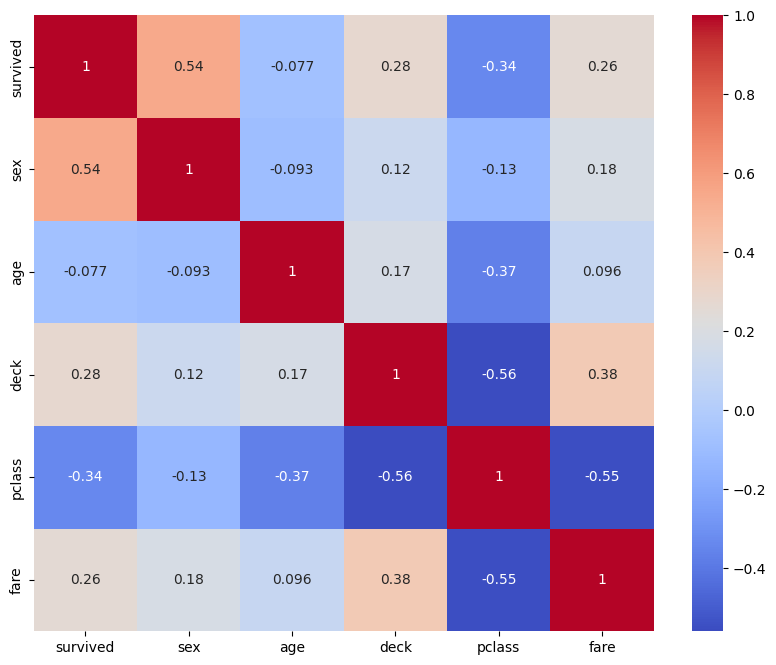

In [57]:
# trasnformation de la colonne dexk en vazleur numerique
df["deck"], _ = pd.factorize(df["deck"])
# transformation de la colonne sex en valeur numerique
df["sex"], _ = pd.factorize(df["sex"])
# Sélectionnez uniquement les colonnes spécifiques
df_selected = df[["survived", "sex", "age", "deck", "pclass", "fare"]]
# Calcul de la corrélation entre les colonnes
corr = df_selected.corr()

# Création du heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")

# Affichage du heatmap
plt.show()

<Axes: >

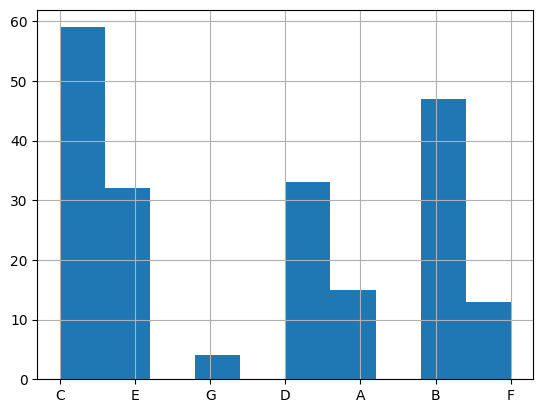

In [52]:
df["deck"].hist()

C:\Users\romar\AppData\Local\Temp\ipykernel_25204\4158267451.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y="tranche_dage", x="deck", palette="pastel")


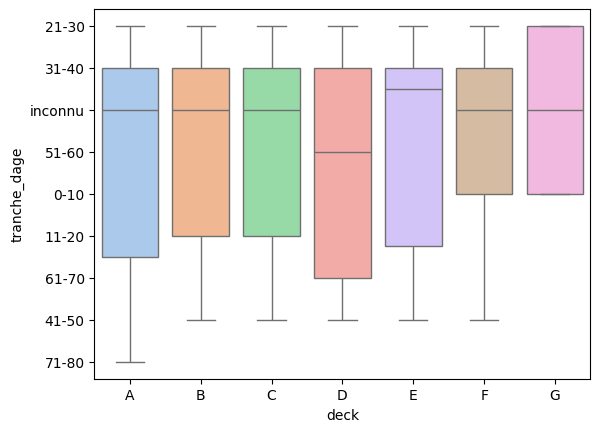

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df, y="tranche_dage", x="deck", palette="pastel")
plt.show()

In [29]:
# test d'annova permet de trouver une correaltion quanti-quali
import scipy.stats as stats

# Sélectionnez vos variables quantitatives et qualitatives
quanti = df["age"]
quali = df["pclass"]

# Effectuez le test ANOVA
fvalue, pvalue = stats.f_oneway(quanti, quali)
print("Résultat du test ANOVA : F=", fvalue, ", p=", pvalue)

# correlation_annova=df.select_dtypes("number").annova(cor)

Résultat du test ANOVA : F= nan , p= nan


In [58]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Créer un modèle OLS
traitement = ols("valeur ~ categorie", df).fit()

# Effectuer le test ANOVA sur le modèle
resultat = anova_lm(traitement)

print(f"\nRésultat :\n{resultat} \n")

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
sns.boxplot(data=df, xlab="", ylab="")

In [75]:
# Importation des bibliothèques nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# Chargement du DataFrame
df = sns.load_dataset("titanic")

# Suppression des lignes qui contiennent des valeurs manquantes
df = df.dropna()

# Transformation de toutes les colonnes non numériques en valeurs numériques
# df = pd.get_dummies(df)
#  autre solution si dummies genere trop de colonnes
for col in df.columns:
    if df[col].dtype == "object":
        freq = df[col].value_counts()
        df[col] = df[col].map(freq)

# Normalisation et standardisation des données
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Analyses statistiques des colonnes
print(df_scaled.describe())

# Recherche des corrélations entre les différentes colonnes
corr = df_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

# Pipeline complet
pipeline = Pipeline(
    [
        ("scaling", StandardScaler()),
        ("pca", PCA(n_components=2)),
        ("clustering", KMeans(n_clusters=2)),
    ]
)

# Clustering et ACP
pipeline.fit(df)
df["cluster"] = pipeline.predict(df)

# Graphiques les plus appropriés
sns.pairplot(df, hue="cluster")
plt.show()

ValueError: Cannot cast object dtype to float64

In [81]:
# Importation des bibliothèques nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Chargement du DataFrame
df = sns.load_dataset("titanic")

# Suppression des lignes qui contiennent des valeurs manquantes
df = df.dropna()

# Transformation de toutes les colonnes non numériques en valeurs numériques
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Normalisation et standardisation des données
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Analyses statistiques des colonnes
print(df_scaled.describe())

# Recherche des corrélations entre les différentes colonnes
corr = df_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

# Pipeline complet
pipeline = Pipeline(
    [
        ("scaling", StandardScaler()),
        ("pca", PCA(n_components=2)),
        ("clustering", KMeans(n_clusters=2)),
    ]
)

# Clustering et ACP
pipeline.fit(df)
df["cluster"] = pipeline.predict(df)

# Graphiques les plus appropriés
sns.pairplot(df, hue="cluster")
plt.show()

ValueError: Cannot cast object dtype to float64

DASH

In [8]:
!pip install dash
!pip install dash-bootstrap-components

  Using cached dash_bootstrap_components-1.5.0-py3-none-any.whl.metadata (5.2 kB)
Using cached dash_bootstrap_components-1.5.0-py3-none-any.whl (221 kB)


In [9]:
import dash
import dash_bootstrap_components as dbc
from dash import html, dcc
from dash.dependencies import Input, Output, State

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container(
    [
        dbc.Row(dbc.Col(html.H3("Cliquez sur le Bouton"))),
        dbc.Row(
            [
                dbc.Col(
                    dcc.Input(
                        id="input-text", type="text", placeholder="Entrez un texte"
                    )
                ),
                dbc.Col(html.Button("Mettre à Jour",
                        id="submit-button", n_clicks=0)),
                dbc.Col(html.Div(id="output-text")),
            ]
        ),
    ]
)


@app.callback(
    Output("output-text", "children"),
    [Input("submit-button", "n_clicks")],
    [State("input-text", "value")],
)
def update_output(n_clicks, text):
    if n_clicks > 0:
        return text
    else:
        return "Cliquez sur le bouton pour afficher le texte"


if __name__ == "__main__":
    app.run_server(debug=True)

In [ ]:
# pi2   quali/qauli
# kewness
# annov

# Test indépendance entre deux variables quantitatives / Test de corrélation Pearson
# Test d'indépendance entre deux variables qualitatives / Test du Chi²
# Test d'indépendance entre une variable qualitative et une quantitative / Test de Fisher avec l'analyse de la variance (ANOVA)

# test d'indépendance
## Test de corrélation Pearson
Test d’indépendance entre deux variables quantitatives / Test de corrélation Pearson : Supposons que nous voulions étudier la relation entre la consommation de viande et l’espérance de vie selon le pays1. Le coefficient de corrélation de Pearson, noté r, quantifie les relations linéaires entre ces deux variables. Si r est proche de 0, alors il n’y a aucune relation linéaire entre les variables. Si r est proche de -1, alors les variables sont dépendantes linéairement négativement1.
## Test du Chi²
Test d’indépendance entre deux variables qualitatives / Test du Chi² : Supposons que nous voulions tester si la couleur des cheveux est indépendante du sexe2. Pour cela, nous utiliserions un test du Chi². Ce test statistique est utilisé pour des variables catégorielles et permet d’accepter ou de rejeter une hypothèse nulle selon son adéquation aux données2. Un autre exemple serait de décider si la décision des spectateurs de films d’acheter des snacks est liée au type de film qu’ils ont l’intention de voir3.
## Test de Fisher avec l’analyse de la variance (ANOVA)
Test d’indépendance entre une variable qualitative et une quantitative / Test de Fisher avec l’analyse de la variance (ANOVA) : Supposons que nous ayons trois groupes de patients à qui nous avons administré trois types différents d’aliments et que nous mesurions un certain paramètre de santé. Nous pourrions utiliser l’ANOVA pour déterminer si les moyennes de ces trois groupes sont différentes4. L’ANOVA utilise des tests F pour tester statistiquement l’égalité des moyennes4. Par exemple, nous pourrions utiliser un test F pour déterminer si les moyennes de résistance de quatre échantillons de plastique sont différentes4.
## Shapiro-Wilk
Le test de **Shapiro-Wilk** est un test statistique qui vérifie l’hypothèse nulle selon laquelle un échantillon provient d’une population normalement distribuée1. 
Si la p-value est inférieure à un niveau alpha choisi (par exemple 0.05), alors l’hypothèse nulle est rejetée (c’est-à-dire qu’il est improbable d’obtenir de telles données en supposant qu’elles soient normalement distribuées).
Si la p-value est supérieure au niveau alpha choisi (par exemple 0.05), alors on ne doit pas rejeter l’hypothèse nulle.
Le test de Shapiro-Wilk est largement utilisé en statistiques pour **tester la normalité des données** avant de réaliser des tests d’hypothèse qui supposent une distribution normale2.  

In [ ]:
# Test d'indépendance entre une variable qualitative et une quantitative / Test de Fisher avec l'analyse de la variance (ANOVA)
def anova(dataframe, colonneNumerique, colonneQualitative, p_value=0.05):
    import pandas as pd
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import anova_lm

    traitement = ols(f"{colonneNumerique} ~ {colonneQualitative}", dataframe)
    traitement.fit()
    resultat = anova_lm(traitement.fit())
    print(resultat)
    print("La p-value vaut", resultat.loc[f"{colonneQualitative}", "PR(>F)"])

    if resultat.loc[f"{colonneQualitative}", "PR(>F)"] > p_value:
        print(f"Il n'y a pas de corrélation entre la colonne {
              colonneNumerique} et {colonneQualitative}")
    elif resultat.loc[f"{colonneQualitative}", "PR(>F)"] < p_value:
        print(f"Il a une corrélation entre la colonne {
              colonneNumerique} et {colonneQualitative}")

In [ ]:
#  Test de normalite de shapiro-Wilk
import pandas as pd
from scipy.stats import shapiro

# Supposons que 'df' est votre DataFrame contenant les données du Titanic
# et que 'Age' est la colonne contenant l'âge des passagers.

# Suppression des valeurs manquantes dans la colonne 'Age'
age = df["Age"].dropna()

# Effectuer le test de Shapiro-Wilk pour la normalité
stat, p = shapiro(age)

# Afficher la statistique de test et la p-value
print("Test Statistic:", round(stat, 3))
print("p-value:", round(p, 3))

ACP

In [4]:
# Résumé des informations du dataframe
your_dataframe = df
print(f"\nshape: {your_dataframe.shape} \nlist columns :\n{
      your_dataframe.columns.tolist()} ")
print(f"liste des colonnes numeriques: \n{
      your_dataframe.select_dtypes(include=[np.number]).columns.tolist()}\n")
print(f"liste des colonnes non numeriques: \n{
      your_dataframe.select_dtypes(exclude=[np.number]).columns.tolist()} ")
print(f"Noms des colonnes avec au moins une valeur NA : {
      your_dataframe.columns[your_dataframe.isna().any()].tolist()}")
print(f"Nombre de lignes avec au moins une valeur NA : {
      your_dataframe.isna().any(axis=1).sum()}")
print(f"Colonne avec des na :{your_dataframe.isna().sum()} \n")
print(f"\ndf head :\n{your_dataframe.head(2)} \n")
print(f"\ndf describe :\n{your_dataframe.describe()} \n")


shape: (203, 15) 
list columns :
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'] 
liste des colonnes numeriques: 
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

liste des colonnes non numeriques: 
['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'] 
Noms des colonnes avec au moins une valeur NA : ['age', 'embarked', 'embark_town']
Nombre de lignes avec au moins une valeur NA : 21
Colonne avec des na :survived        0
pclass          0
sex             0
age            19
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
deck            0
embark_town     2
alive           0
alone           0
dtype: int64 


df head :
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1         1       1  female  38.0      1      0  71.2833        C  First   


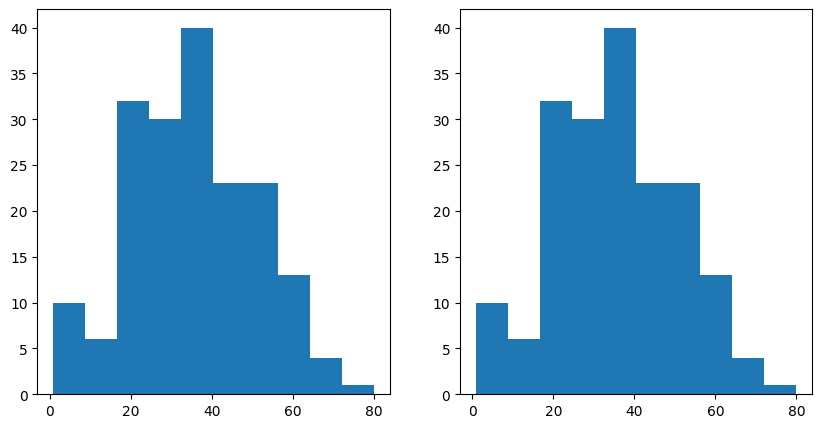

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df["age"].dropna())
plt.subplot(1, 2, 2)
plt.hist(df["age"])
plt.show()


 df_normalized:
     survived  pclass       age     sibsp  parch      fare  sex_female  \
0         1.0     0.0  0.468892  0.333333   0.00  0.139136         1.0   
1         1.0     0.0  0.430956  0.333333   0.00  0.103644         1.0   
2         0.0     0.0  0.671219  0.000000   0.00  0.101229         0.0   
3         1.0     1.0  0.038948  0.333333   0.25  0.032596         1.0   
4         1.0     0.0  0.721801  0.000000   0.00  0.051822         1.0   
..        ...     ...       ...       ...    ...       ...         ...   
177       1.0     0.0  0.582701  0.333333   0.25  0.102579         1.0   
178       0.0     0.0  0.405665  0.000000   0.00  0.009759         0.0   
179       1.0     0.0  0.696510  0.000000   0.25  0.162314         1.0   
180       1.0     0.0  0.228629  0.000000   0.00  0.058556         1.0   
181       1.0     0.0  0.317147  0.000000   0.00  0.058556         0.0   

     sex_male  embarked_C  embarked_Q  ...  deck_E  deck_F  deck_G  \
0         0.0         1.

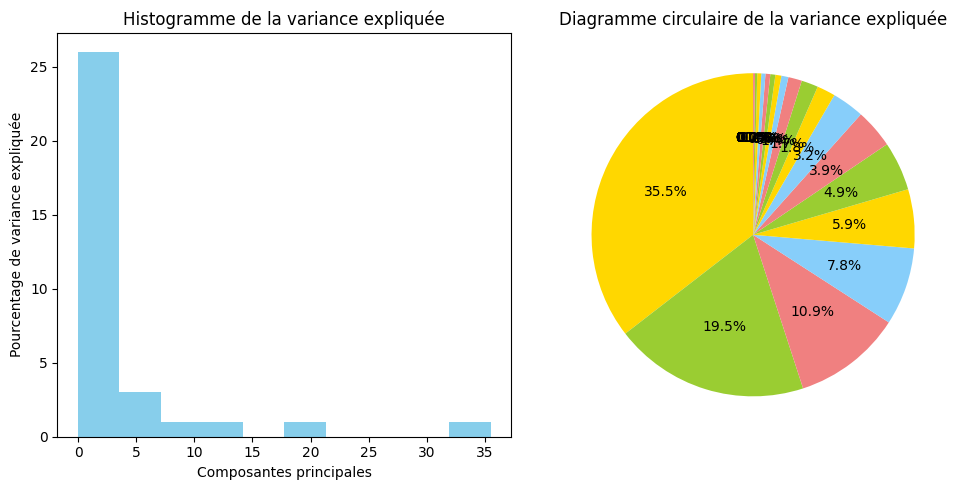

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Chargement du DataFrame
df = sns.load_dataset("titanic")

# Suppression des valeurs manquantes dans la colonne 'deck'
# df = df.dropna(subset=['deck'])
df = df.dropna()

# Liste des colonnes non numériques
non_numeric_columns = [
    "sex",
    "embarked",
    "class",
    "who",
    "adult_male",
    "deck",
    "embark_town",
    "alive",
    "alone",
]

# Transformation des colonnes non numériques
df = pd.get_dummies(df, columns=non_numeric_columns)

# Création de l'objet MinMaxScaler
scaler = MinMaxScaler()

# Ajustement et transformation des données
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(f"\n df_normalized:\n{df_normalized} \n")

acp = PCA()
composantes_principales = acp.fit_transform(df_normalized)

# Create a DataFrame from the principal components
df_composantes_principales = pd.DataFrame(composantes_principales)

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(acp.explained_variance_ratio_ * 100, color="skyblue")
plt.title("Histogramme de la variance expliquée")
plt.xlabel("Composantes principales")
plt.ylabel("Pourcentage de variance expliquée")

plt.subplot(1, 2, 2)
plt.pie(
    acp.explained_variance_ratio_ * 100,
    autopct="%1.1f%%",
    startangle=90,
    colors=["gold", "yellowgreen", "lightcoral", "lightskyblue"],
)
plt.title("Diagramme circulaire de la variance expliquée")

plt.tight_layout()
plt.show()

LinearRegression MSE: 0.0
LinearRegression Accuracy: 1.0
SVR MSE: 0.221
SVR Accuracy: 0.649
KNeighborsRegressor MSE: 0.254
KNeighborsRegressor Accuracy: 0.649
MLPRegressor MSE: 0.039
MLPRegressor Accuracy: 1.0
Chosen model Test MSE: 0.0
Chosen model Accuracy: 1.0


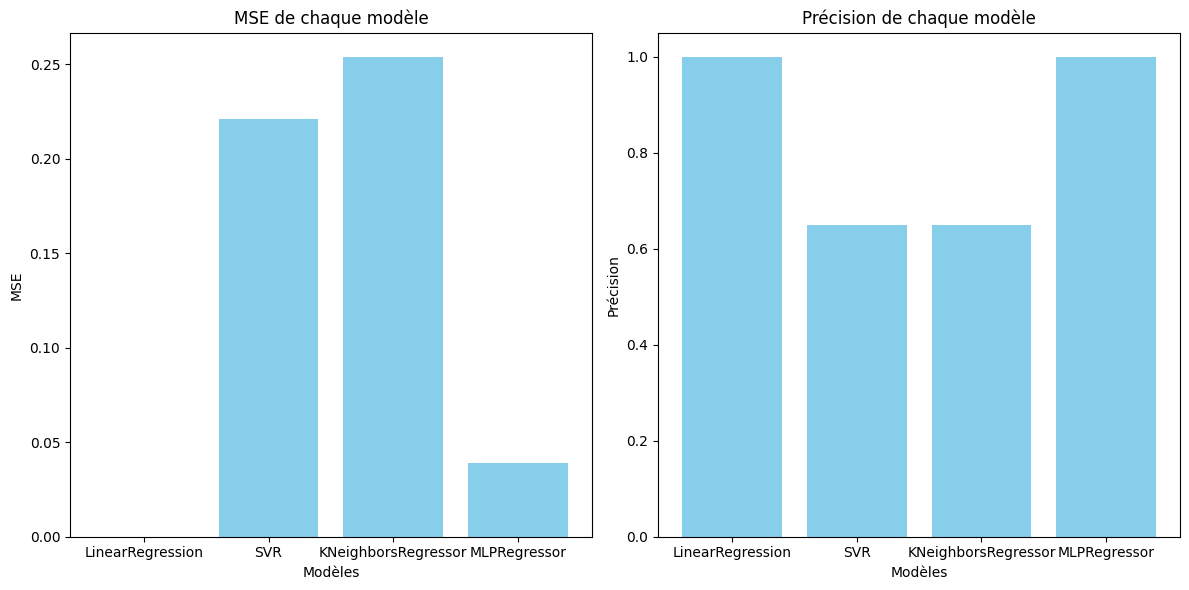

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Définition de la variable cible 'y' et de l'ensemble de caractéristiques 'X'
y = df['survived']
X = df.drop('survived', axis=1)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Création d'un ensemble de validation à partir de l'ensemble d'entraînement
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Initialisation des modèles
models = {
    "LinearRegression": LinearRegression(),
    "SVR": SVR(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "MLPRegressor": MLPRegressor(max_iter=2000, random_state=42)
}

mse_values = []
accuracy_values = []
model_names = []

# Entraînement des modèles et évaluation sur l'ensemble de validation
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    mse = round(mean_squared_error(y_valid, predictions), 3)
    print(f"{name} MSE: {mse}")
    mse_values.append(mse)

    # Prédictions sur l'ensemble de test et calcul du score de précision
    test_predictions = model.predict(X_test)
    accuracy = round(accuracy_score(y_test, test_predictions.round()), 3)
    print(f"{name} Accuracy: {accuracy}")
    accuracy_values.append(accuracy)

    model_names.append(name)

# Prédictions sur l'ensemble de test avec le modèle choisi
# Remplacez par le modèle de votre choix
chosen_model = models["LinearRegression"]
test_predictions = chosen_model.predict(X_test)
print(f"Chosen model Test MSE: {
      round(mean_squared_error(y_test, test_predictions), 3)}")
print(f"Chosen model Accuracy: {
      round(accuracy_score(y_test, test_predictions.round()), 3)}")

# Création des graphiques
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(model_names, mse_values, color='skyblue')
plt.title('MSE de chaque modèle')
plt.xlabel('Modèles')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.bar(model_names, accuracy_values, color='skyblue')
plt.title('Précision de chaque modèle')
plt.xlabel('Modèles')
plt.ylabel('Précision')

plt.tight_layout()
plt.show()

Définition de la variable cible ‘y’ et de l’ensemble de caractéristiques ‘X’
y = df[‘survived’] X = df.drop(‘survived’, axis=1)

Séparation des données en ensembles d’entraînement et de test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

Création d’un ensemble de validation à partir de l’ensemble d’entraînement
X_train, X_valid, y_train, y_valid = train_test_split( X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

Initialisation des modèles
models = { “LinearRegression”: LinearRegression(), “SVR”: SVR(), “KNeighborsRegressor”: KNeighborsRegressor(), “MLPRegressor”: MLPRegressor(max_iter=2000, random_state=42) }

mse_values = [] accuracy_values = [] model_names = []

Entraînement des modèles et évaluation sur l’ensemble de validation
for name, model in models.items(): model.fit(X_train, y_train) predictions = model.predict(X_valid) mse = round(mean_squared_error(y_valid, predictions), 3) print(f"{name} MSE: {mse}") mse_values.append(mse)

# Prédictions sur l'ensemble de test et calcul du score de précision
test_predictions = model.predict(X_test)
accuracy = round(accuracy_score(y_test, test_predictions.round()), 3)
print(f"{name} Accuracy: {accuracy}")
accuracy_values.append(accuracy)

model_names.append(name)

Prédictions sur l’ensemble de test avec le modèle choisi
chosen_model = models[“LinearRegression”] # Remplacez par le modèle de votre choix test_predictions = chosen_model.predict(X_test) print(f"Chosen model Test MSE: {round(mean_squared_error(y_test, test_predictions), 3)}“) print(f"Chosen model Accuracy: {round(accuracy_score(y_test, test_predictions.round()), 3)}”)

Création des graphiques
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) plt.bar(model_names, mse_values, color=‘skyblue’) plt.title(‘MSE de chaque modèle’) plt.xlabel(‘Modèles’) plt.ylabel(‘MSE’)

plt.subplot(1, 2, 2) plt.bar(model_names, accuracy_values, color=‘skyblue’) plt.title(‘Précision de chaque modèle’) plt.xlabel(‘Modèles’) plt.ylabel(‘Précision’)

plt.tight_layout() plt.show() [assistant]=(#message|) Votre code semble correct maintenant. Vous avez bien initialisé les listes mse_values, accuracy_values et model_names avant de les utiliser. Vous avez entraîné chaque modèle une seule fois sur l’ensemble d’entraînement, fait des prédictions sur l’ensemble de validation et l’ensemble de test, et calculé le MSE et le score de précision pour chaque modèle. Ensuite, vous avez fait des prédictions sur l’ensemble de test avec le modèle choisi et calculé le MSE et le score de précision. Enfin, vous avez créé des graphiques à barres pour visualiser le MSE et le score de précision de chaque modèle. Si vous rencontrez des problèmes avec ce code, n’hésitez pas à me donner plus de détails afin que je puisse vous aider davantage. 😊 [user]=(#message|) corrige from sklearn.metrics import accuracy_score from sklearn.model_selection import train_test_split from sklearn.linear_model import LinearRegression from sklearn.svm import SVR from sklearn.neighbors import KNeighborsRegressor from sklearn.neural_network import MLPRegressor from sklearn.metrics import mean_squared_error import matplotlib.pyplot as plt

Définition de la variable cible ‘y’ et de l’ensemble de caractéristiques ‘X’
y = df[‘survived’] X = df.drop(‘survived’, axis=1)

Séparation des données en ensembles d’entraînement et de test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

Création d’un ensemble de validation à partir de l’ensemble d’entraînement
X_train, X_valid, y_train, y_valid = train_test_split( X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

Initialisation des modèles
models = { “LinearRegression”: LinearRegression(), “SVR”: SVR(), “KNeighborsRegressor”: KNeighborsRegressor(), “MLPRegressor”: MLPRegressor(max_iter=2000, random_state=42) }

mse_values = [] accuracy_values = [] model_names = []

Entraînement des modèles et évaluation sur l’